In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.calibration import CalibratedClassifierCV

In [2]:
titanic=pd.read_csv('S:\\titanic.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

# Analysing data

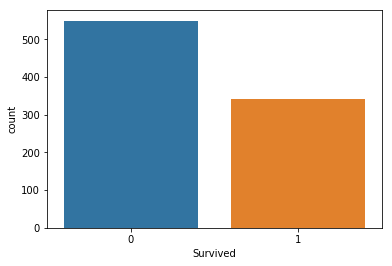

In [4]:
sns.countplot(x='Survived',data=titanic)

around 550 passengers did not survive and 330 passengers survived

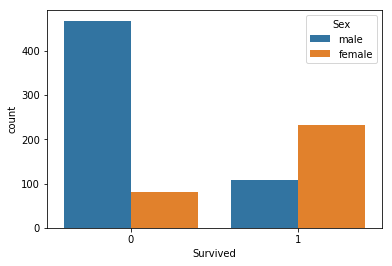

In [5]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

There are more number of female passengers who survived than male passengers

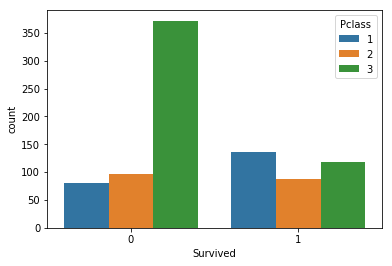

In [6]:
sns.countplot(x='Survived',hue='Pclass',data=titanic )

Passengers who survived the most is class 1 and survived the least is of class 2

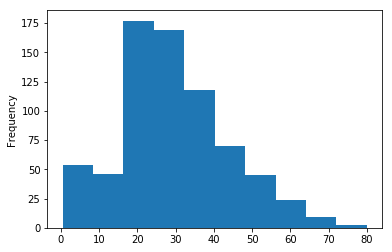

In [7]:
titanic['Age'].plot.hist()

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

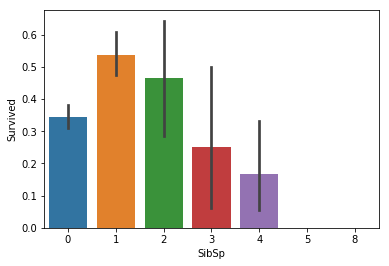

In [9]:
sns.barplot(x="SibSp", y="Survived", data=titanic)

 it's clear that people with more siblings or spouses aboard were less likely to survive.

In [10]:
for i in titanic:
    titanic['Title']=titanic.Name.str.extract('([A-Za-z]+)\.')
pd.crosstab(titanic['Title'], titanic['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [11]:
titanic['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [12]:
##Now lets fill the Nan values with average values so let us find avg of age by their Title
titanic.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [13]:
#filling the null values
titanic.loc[(titanic.Age.isnull())&(titanic.Title=='Master'),'Age']=5
titanic.loc[(titanic.Age.isnull())&(titanic.Title=='Miss'),'Age']=22
titanic.loc[(titanic.Age.isnull())&(titanic.Title=='Mr'),'Age']=33
titanic.loc[(titanic.Age.isnull())&(titanic.Title=='Mrs'),'Age']=36
titanic.loc[(titanic.Age.isnull())&(titanic.Title=='Other'),'Age']=46

In [14]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [15]:
titanic.drop(columns=['Cabin'],inplace=True)

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


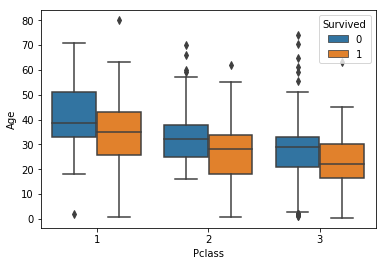

In [17]:
sns.boxplot('Pclass','Age',hue='Survived',data=titanic)

We can see from the above plot that children from age 0-15 are survived mostly

C:\Users\sudee\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


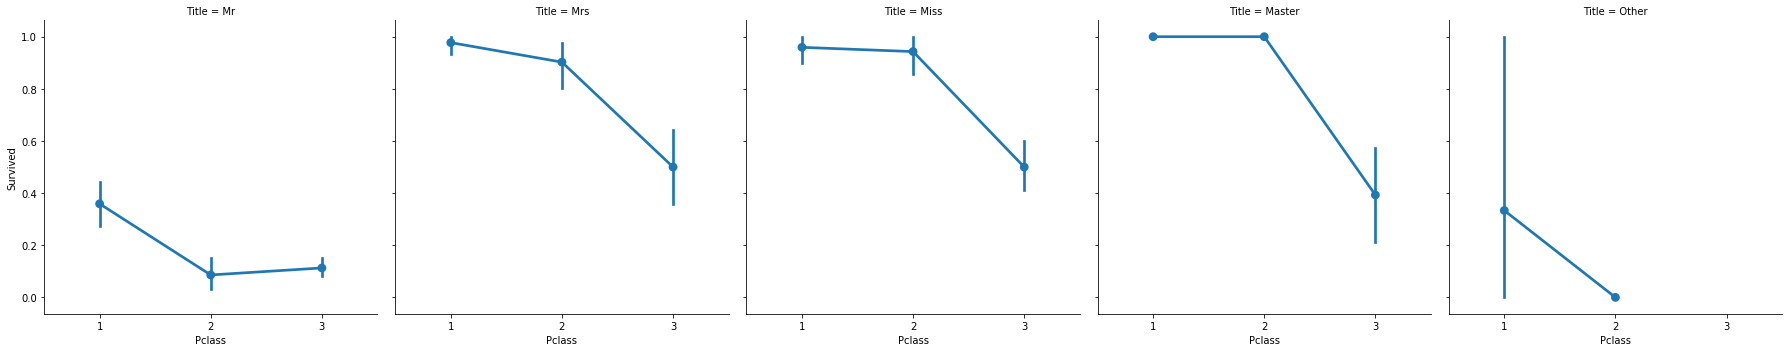

In [18]:
sns.factorplot('Pclass','Survived',col='Title',data=titanic)


We can observe that children and women were given the first priority

C:\Users\sudee\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


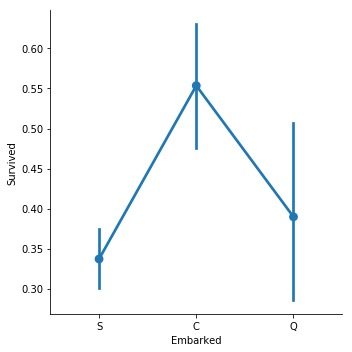

In [19]:
sns.factorplot('Embarked','Survived',data=titanic)

chances for survival for Port C is highest around 0.55 while it is lowest for S.

# Observations

1. Women are given first priority
2. Children of age 1-15 also survived the most
3. Passengers of class 1 survived mostly and class 3 survived the least
4. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S.
Passengers at Q were all from Pclass3.
5. Having 1-2 sibsp shows greater chance of survival.


# Feature Engineering

Age is a continous variable, we need to convert it into a categorical variable.
The maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.

In [20]:
titanic.loc[titanic.Age<=16,'Age group']=0
titanic.loc[(titanic.Age>16)&(titanic.Age<=32),'Age group']=1
titanic.loc[(titanic.Age>32)&(titanic.Age<=48),'Age group']=2
titanic.loc[(titanic.Age>48)&(titanic.Age<=64),'Age group']=3
titanic.loc[(titanic.Age>64),'Age group']=4

In [21]:
titanic.loc[titanic.Fare<=7.91,'Fare_cat']=0
titanic.loc[(titanic.Fare>7.91)&(titanic.Fare<=14.454),'Fare_cat']=1
titanic.loc[(titanic.Fare>14.454)&(titanic.Fare<=31),'Fare_cat']=2
titanic.loc[(titanic.Fare>31)&(titanic.Fare<=513),'Fare_cat']=3

In [22]:
#Family size
titanic['family_size']=titanic['Parch']+titanic['SibSp']
titanic.loc[titanic.family_size==0,'Alone']=1

C:\Users\sudee\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


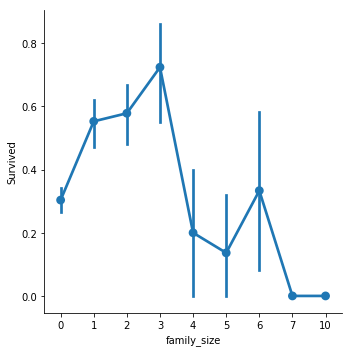

In [23]:
sns.factorplot('family_size','Survived',data=titanic)

If family size is 0 i.e alone then chances of survival is less and if family size is greater than 4 the also chances are less

In [24]:
#string values to categorical variables
titanic['Sex'].replace(['male','female'],[0,1],inplace=True)
titanic['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
titanic['Title'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

# dropping unwanted columns


In [25]:
titanic=titanic.drop(columns=['Age','Name','Ticket','PassengerId','SibSp','Parch','Fare','Alone'])
titanic.head()

,Survived,Pclass,Sex,Embarked,Title,Age group,Fare_cat,family_size
0,0,3,0,0.0,0,1.0,0.0,1
1,1,1,1,1.0,1,2.0,3.0,1
2,1,3,1,0.0,2,1.0,1.0,0
3,1,1,1,0.0,1,2.0,3.0,1
4,0,3,0,0.0,0,2.0,1.0,0


# Splitting data into train and test datasets

In [53]:
titanic.fillna(-99999, inplace=True)
X=titanic.drop(columns=['Survived'])
Y=titanic.Survived
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=101)

Accuracy of log_reg is: 0.7713004484304933


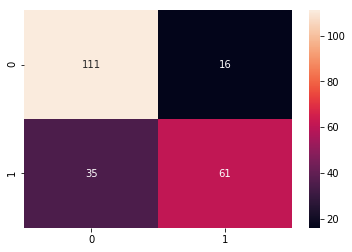

In [61]:
#fitting the models
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
pred=log_reg.predict(x_test)
print('Accuracy of log_reg is:',metrics.accuracy_score(pred,y_test))
sns.heatmap(metrics.confusion_matrix(y_test,pred),annot=True,fmt='2.0f')

Accuracy of knn is: 0.7892376681614349


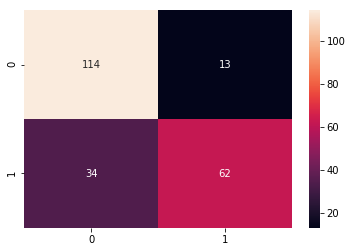

In [62]:
knn=KNeighborsClassifier() 
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('Accuracy of knn is:',metrics.accuracy_score(pred,y_test))
sns.heatmap(metrics.confusion_matrix(y_test,pred),annot=True,fmt='2.0f')

Accuracy for rbf SVM is  0.7982062780269058


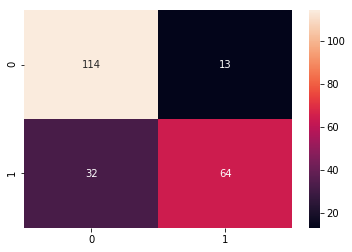

In [64]:
svm_rbf=svm.SVC(kernel='rbf',C=1,gamma=0.1)
svm_rbf.fit(x_train,y_train)
pred=svm_rbf.predict(x_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(pred,y_test))
sns.heatmap(metrics.confusion_matrix(y_test,pred),annot=True,fmt='2.0f')

In [68]:
#Accuracies for different values of K in knn
a=[]
for i in range(1,10):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred1=model.predict(x_test)
    a.append(metrics.accuracy_score(pred1,y_test))
print('Accuracies for different values of n are:',a)
    

Accuracies for different values of n are: [0.7802690582959642, 0.7668161434977578, 0.7982062780269058, 0.7713004484304933, 0.7892376681614349, 0.7892376681614349, 0.7847533632286996, 0.8071748878923767, 0.8161434977578476]


Accuracy is improving by increasing the values of n

# Hyperparameter Tuning

In [71]:
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(x_train,y_train)
gd_pred=gd.predict(x_test)
print('Accuracy:',metrics.accuracy_score(gd_pred,y_test))
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Accuracy: 0.7982062780269058
0.841286050948266
SVC(C=1, gamma=0.1)


In [78]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

C:\Users\sudee\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sudee\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

,CV Mean,Std
Linear Svm,0.786729,0.039372
Radial Svm,0.618452,0.070059
Logistic Regression,0.801361,0.025021
KNN,0.814869,0.038342
Decision Tree,0.803633,0.031161
Naive Bayes,0.618452,0.070059
Random Forest,0.820449,0.041013
